In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud, STOPWORDS
from matplotlib.dates import MonthLocator
from ipywidgets import widgets, interactive
from datetime import date, timedelta, datetime
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import pymysql
import math
from ast import literal_eval
import plotly.offline as py
py.init_notebook_mode(connected=True)
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
import warnings; warnings.simplefilter('ignore')
pd.options.mode.chained_assignment = None

In [2]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    db='dv_db',
)

In [3]:
#df_ratings = pd.read_csv("ratings_small.csv")

In [4]:
try:
    with connection.cursor() as cursor:
        sql = "SELECT * FROM ratings"
        try:
            cursor.execute(sql)
            result = cursor.fetchall()
 
            df_ratings = pd.DataFrame(result, columns=["ratingId", "userId", "movieId", "rating", "timestamp"])
 
        except:
            print("Oops! Something wrong")
 
    connection.commit()
finally:
    connection.close()

In [5]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='',
    db='dv_db',
)

In [6]:
try:
    with connection.cursor() as cursor:
        sql = "SELECT * FROM movies"
        try:
            cursor.execute(sql)
            result = cursor.fetchall()
 
            df_metadata = pd.DataFrame(result, columns=["movieEntryId", "id", "belongs_to_collection", "budget", "genres",
                                                       "imdb_id", "original_language", "original_title", "overview", "popularity", "production_companies",
                                                       "production_countries", "release_date", "revenue", "runtime", "spoken_languages", "status", "title", "vote_average", "vote_count",
                                                       "year", "cast", "keywords", "cast_size", "crew_size", "director", "movieId"])
 
        except:
            print("Oops! Something wrong")
 
    connection.commit()
finally:
    connection.close()

In [7]:
df_metadata

,movieEntryId,id,belongs_to_collection,budget,genres,imdb_id,original_language,original_title,overview,popularity,...,title,vote_average,vote_count,year,cast,keywords,cast_size,crew_size,director,movieId
0,1,862,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"Animation,Comedy,Family",tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946900,...,Toy Story,7.70000,5415.0,1995,"Tom Hanks,Tim Allen,Don Rickles","jealousy,toy,boy,friendship,friends,rivalry,bo...",13,106,John Lasseter,1
1,2,8844,{},65000000.0,"Adventure,Fantasy,Family",tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015500,...,Jumanji,6.90000,2413.0,1995,"Robin Williams,Jonathan Hyde,Kirsten Dunst","board game,disappearance,based on children's b...",26,16,Joe Johnston,2
2,3,15602,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"Romance,Comedy",tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,...,Grumpier Old Men,6.50000,92.0,1995,"Walter Matthau,Jack Lemmon,Ann-Margret","fishing,best friend,duringcreditsstinger,old men",7,4,Howard Deutch,3
3,4,31357,{},16000000.0,"Comedy,Drama,Romance",tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859490,...,Waiting to Exhale,6.21143,35.0,1995,"Whitney Houston,Angela Bassett,Loretta Devine","based on novel,interracial relationship,single...",10,10,Forest Whitaker,4
4,5,11862,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,Comedy,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387520,...,Father of the Bride Part II,5.70000,173.0,1995,"Steve Martin,Diane Keaton,Martin Short","baby,midlife crisis,confidence,aging,daughter,...",12,7,Charles Shyer,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9214,9215,159550,{},8000000.0,Drama,tt0255313,en,The Last Brickmaker in America,A man must cope with the loss of his wife and ...,0.038998,...,The Last Brickmaker in America,7.00000,1.0,2001,"Sidney Poitier,Wendy Crewson,Jay O. Sanders","friendship,brick making",7,2,Gregg Champion,161944
9215,9216,392572,{},1000000.0,"Thriller,Romance",tt5165344,hi,रुस्तम,"Rustom Pavri, an honourable officer of the Ind...",7.333140,...,Rustom,7.30000,25.0,2016,"Akshay Kumar,Ileana D'Cruz,Esha Gupta",bollywood,14,16,Tinu Suresh Desai,162542
9216,9217,402672,{},15050000.0,"Adventure,Drama,History,Romance",tt3859980,hi,Mohenjo Daro,"Village lad Sarman is drawn to big, bad Mohenj...",1.423360,...,Mohenjo Daro,6.70000,26.0,2016,"Hrithik Roshan,Pooja Hegde,Kabir Bedi",bollywood,12,16,Ashutosh Gowariker,162672
9217,9218,315011,{},15000000.0,"Action,Adventure,Drama,Horror,Science Fiction",tt4262980,ja,シン・ゴジラ,From the mind behind Evangelion comes a hit la...,9.285520,...,Shin Godzilla,6.60000,152.0,2016,"Hiroki Hasegawa,Yutaka Takenouchi,Satomi Ishihara","monster,godzilla,giant monster,destruction,kai...",49,27,Hideaki Anno,163056


In [8]:
df_metadata['movieId'] = pd.to_numeric(df_metadata['movieId'])

In [9]:
req_cols = ['movieId', 'original_title']

In [10]:
df_movie = df_ratings.merge(df_metadata[req_cols], on = 'movieId', how = 'left')

In [11]:
df_movie = df_movie.dropna().reset_index(drop=True)

In [12]:
df_movie['timestamp'] = pd.to_datetime(df_movie['timestamp'], unit='s').dt.strftime('%Y-%m-%d')
df_movie['timestamp'] = df_movie['timestamp'].astype('datetime64[ns]')

In [13]:
type(df_movie.iloc[1].timestamp)

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_movie['timestamp']

0        2020-12-14
1        2020-12-14
2        2020-12-14
3        2020-12-14
4        2020-12-14
            ...    
100122   2021-06-01
100123   2021-06-01
100124   2021-06-07
100125   2021-06-07
100126   2021-06-07
Name: timestamp, Length: 100127, dtype: datetime64[ns]

In [15]:
df_movie = df_movie.sort_values(by='timestamp')

In [16]:
df_movie

,ratingId,userId,movieId,rating,timestamp,original_title
80684,80577,547,90866,4.5,2020-02-29,Hugo
24083,24035,171,2686,4.0,2020-02-29,The Red Violin
75224,75122,521,79132,4.0,2020-06-01,Inception
16579,16532,105,3285,2.5,2020-06-01,The Beach
1481,1486,15,2579,2.5,2020-06-01,Following
...,...,...,...,...,...,...
100122,100005,680,129,2.5,2021-06-01,Pie in the Sky
100123,100009,680,12,3.0,2021-06-01,Dracula: Dead and Loving It
100125,100016,681,12,5.0,2021-06-07,Dracula: Dead and Loving It
100124,100015,681,129,2.5,2021-06-07,Pie in the Sky


In [17]:
df_movie.reset_index(inplace = True, drop=True)

In [18]:
df_movie

,ratingId,userId,movieId,rating,timestamp,original_title
0,80577,547,90866,4.5,2020-02-29,Hugo
1,24035,171,2686,4.0,2020-02-29,The Red Violin
2,75122,521,79132,4.0,2020-06-01,Inception
3,16532,105,3285,2.5,2020-06-01,The Beach
4,1486,15,2579,2.5,2020-06-01,Following
...,...,...,...,...,...,...
100122,100005,680,129,2.5,2021-06-01,Pie in the Sky
100123,100009,680,12,3.0,2021-06-01,Dracula: Dead and Loving It
100124,100016,681,12,5.0,2021-06-07,Dracula: Dead and Loving It
100125,100015,681,129,2.5,2021-06-07,Pie in the Sky


In [19]:
print(df_movie.shape)
df_movie.head()

(100127, 6)


,ratingId,userId,movieId,rating,timestamp,original_title
0,80577,547,90866,4.5,2020-02-29,Hugo
1,24035,171,2686,4.0,2020-02-29,The Red Violin
2,75122,521,79132,4.0,2020-06-01,Inception
3,16532,105,3285,2.5,2020-06-01,The Beach
4,1486,15,2579,2.5,2020-06-01,Following


In [20]:
# Function to preapre Data & Widgets for bar-chart
def preprocess_bar_ratings():
    # Filter last seven months data (inclusive)
    delta = timedelta(days=213)
    stdt = df_movie.timestamp.max()
    endt = df_movie.timestamp.max() - delta
    df_7mon = df_movie
    df_7mon = df_7mon[(df_7mon.timestamp <= stdt) & (df_7mon.timestamp >= endt)]
    df_7mon['month'] = df_7mon['timestamp'].dt.strftime('%b')  #Create a month column
    df_7mon['year'] = df_7mon['timestamp'].dt.strftime('%Y')  #Create an year column
    # Widget for movie selection by dropdown or input text
    movie_bar = widgets.Combobox(
        placeholder='Select a Movie',
        options=tuple(list(df_7mon['original_title'].unique())),
        description='Select Movie:',
        ensure_option=True,
        disabled=False)
    return df_7mon, movie_bar

# Function to Interact with Widget and plot bar-chart
def plotbar_ratings(data):
    df_bar = df_7month
    # Initially the selection value will be Null
    if movie_selector_bar.value != ' ':
        df_bar = df_bar[df_bar.original_title == movie_selector_bar.value]  #Filter the data for selected movie
        # Create a pivot table 
        df_pivot_bar = pd.pivot_table(
                                df_bar,
                                values='userId',
                                index='month',
                                columns='original_title',
                                aggfunc='count',
                                fill_value=0
                                )
        df_pivot_bar = df_pivot_bar.reindex(df_bar.month.unique())
    # Plot it (only if there's data to plot)
    if len(df_bar) > 0:
        ax = df_pivot_bar.plot(kind='barh', figsize=(12,7), color=(0.5,0.1,0.3,0.6), zorder=2, width=0.7)
        vals = ax.get_xticks()
        for tick in vals:
            ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#cccccc', zorder=1)
        ax.set_title("Ratings in last seven months for the movie: {}"
                     .format(movie_selector_bar.value), weight='bold', size=14)
        ax.set_xlabel("Number of Ratings", labelpad=12, size=12)
        ax.set_ylabel("Months", labelpad=12, size=12)
    else:
        print("No data to show for current selection")

In [21]:
df_7month, movie_selector_bar = preprocess_bar_ratings()
print('Bar Chart showing last seven months data for a selected movie')
interactive(plotbar_ratings, data = movie_selector_bar)

Bar Chart showing last seven months data for a selected movie


interactive(children=(Combobox(value='', description='Select Movie:', ensure_option=True, options=('Apollo 13'…

In [22]:
# Function to create Widget for pie-chart
def filter_widget_pie():
    movie_pie = widgets.Combobox(
        # value='John',
        placeholder='Select a Movie',
        options=tuple(list(df_movie['original_title'].unique())),
        description='Select Movie:',
        ensure_option=True,
        disabled=False)
    return movie_pie

# Function to Interact with Widget and plot pie-chart
def plotpie(data):
    df_pie = df_movie
    df_pie = df_pie.sort_values(by='rating')
    df_pie.reset_index(inplace = True, drop=True)
    # Initially the selection value will be Null
    if movie_selector_pie.value != ' ':
        df_pie = df_pie[df_pie.original_title == movie_selector_pie.value]  #Filter the data for selected movie
        # Create a pivot table
        df_pivot_pie = pd.pivot_table(                         
                                    df_pie,
                                    values='userId',
                                    index='rating',
                                    columns='original_title',
                                    aggfunc='count',
                                    fill_value=0
                                )
    # Plot it (only if there's data to plot)
    if len(df_pie) > 0:
        ax = df_pivot_pie.plot(kind='pie', figsize=(12,7),labels=df_pie.rating.unique(), 
                               subplots=True, autopct='%1.2f%%', startangle = 90,
                               title= "Distribution of ratings for the movie: {} ".format(movie_selector_pie.value))

    else:
        print("No data to show for current selection")

In [23]:
movie_selector_pie = filter_widget_pie()
print('Pie Chart showing distribution of ratings for a selected movie')
interactive(plotpie, data = movie_selector_pie)

Pie Chart showing distribution of ratings for a selected movie


interactive(children=(Combobox(value='', description='Select Movie:', ensure_option=True, options=('Hugo', 'Th…

In [24]:
delta_st = timedelta(days=7)
delta_en = timedelta(days=213)
stdt = df_movie.timestamp.max() - delta_st
endt = df_movie.timestamp.max() - delta_en

In [25]:
stdt

Timestamp('2021-05-31 00:00:00')

In [26]:
# Function to preapre Data & Widgets for bar-chart
def preprocess_bar_top10():
    # Filter Date range from last 7 days to last 7 months
    delta_st = timedelta(days=7)
    delta_en = timedelta(days=213)
    stdt = df_movie.timestamp.max() - delta_st
    endt = df_movie.timestamp.max() - delta_en
    df_bar2 = df_movie[(df_movie.timestamp <= stdt) & (df_movie.timestamp >= endt)]
    df_bar2 = df_bar2.sort_values(by='timestamp', ascending=False)
    df_bar2 = df_bar2[df_bar2.rating == 5]
    options = [(i.strftime('%d%b-%Y'), i) for i in df_bar2.timestamp]
    # Widget for Date Range selection (Slider)
    dt_range = widgets.SelectionSlider(
        options=options,
        #description="Slide for Change",
        disabled=False
    )
    return df_bar2, dt_range

# Function to Interact with Widget and plot bar-chart
def plotbar_top10(data):
    # Filter data in slider range
    df_bar_top10 = df_bar2[df_bar2.timestamp >= dt_range.value]
    # Create pivot table
    df_pivot_top10 = pd.pivot_table(                         
                                        df_bar_top10,
                                        values='userId',
                                        index='original_title',
                                        columns='rating',
                                        aggfunc='count',
                                        fill_value=0
                                    )
    df_pivot_top10.reset_index(inplace=True)
    df_pivot_top10.columns = ['original_title', '5_ratings']
    # Filter Top 10 movies with maximum number of 5 star ratings (first 10)
    df_pivot_top10 = df_pivot_top10.nlargest(10, '5_ratings', keep='first')
    df_pivot_top10.reset_index(drop=True, inplace=True)
    # Plot bar chart
    ax = df_pivot_top10.plot.barh(x='original_title', y='5_ratings', figsize=(12,7), color=(0.1,0.6,0.5,0.6), 
                                  zorder=2, width=0.7)
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#cccccc', zorder=1)
    ax.set_title("Top 10 Movies (between {} to {}) ".format(datetime.strftime(df_movie.timestamp.max(), '%d%b-%Y'),
                                                            datetime.strftime(dt_range.value, '%d%b-%Y')), weight='bold', size=14)
    ax.set_xlabel("Number of 5-Star Ratings", labelpad=15, size=13)
    ax.set_ylabel("Top Movies", labelpad=15, size=13)

In [27]:
df_bar2, dt_range = preprocess_bar_top10()
print('Bar Chart showing Top-10 Rated movies (max 5 stars) in selected date range.\n')
interactive(plotbar_top10, data = dt_range)

Bar Chart showing Top-10 Rated movies (max 5 stars) in selected date range.



interactive(children=(SelectionSlider(description='data', options=(('31May-2021', Timestamp('2021-05-31 00:00:…

In [28]:
df_metadata = df_metadata.drop('original_title', axis=1)

In [29]:
df_metadata[df_metadata['revenue'] == 0].shape

(4386, 26)

In [30]:
df = df_metadata

In [31]:
df['revenue'] = df['revenue'].replace(0, np.nan)

In [32]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(4519, 26)

In [33]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape
df['return'] = df['return'].replace(np.nan,0)

In [34]:
df['return'] = df['return'].apply(np.log)

In [35]:
df = df.sort_values('return',ascending=False)

In [36]:
df['return'].head()

3309    16.332917
2780    15.955577
1948    13.833959
7408     9.464238
5674     8.581167
Name: return, dtype: float64

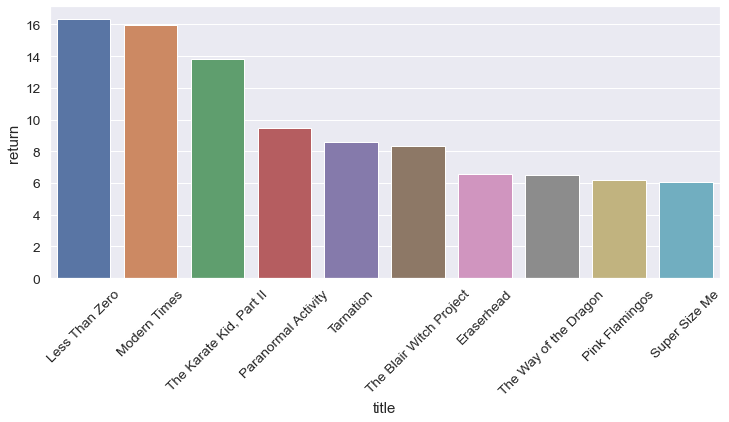

In [37]:
plt.figure(figsize=(12,5))
sns.barplot(x='title', y='return', data=df.iloc[0:10])
plt.xticks(rotation=45)
plt.show()

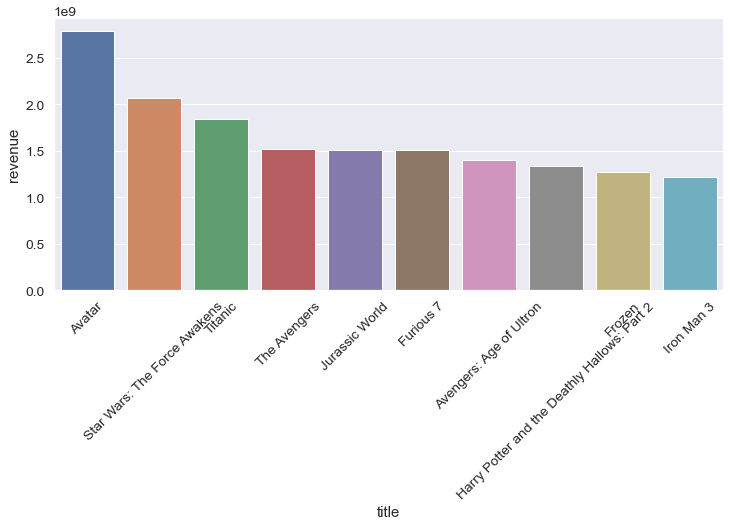

In [38]:
df = df.sort_values('revenue',ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x='title', y='revenue', data=df.iloc[0:10])
plt.xticks(rotation=45)
plt.show()

In [39]:
df['title'] = df['title'].astype('str')
df['overview'] = df['overview'].astype('str')

In [40]:
title_corpus = ' '.join(df['title'])
overview_corpus = ' '.join(df['overview'])

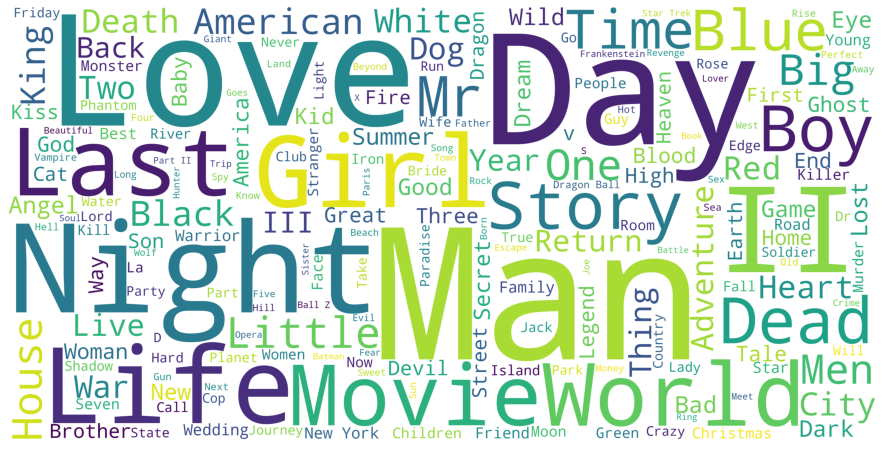

In [41]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

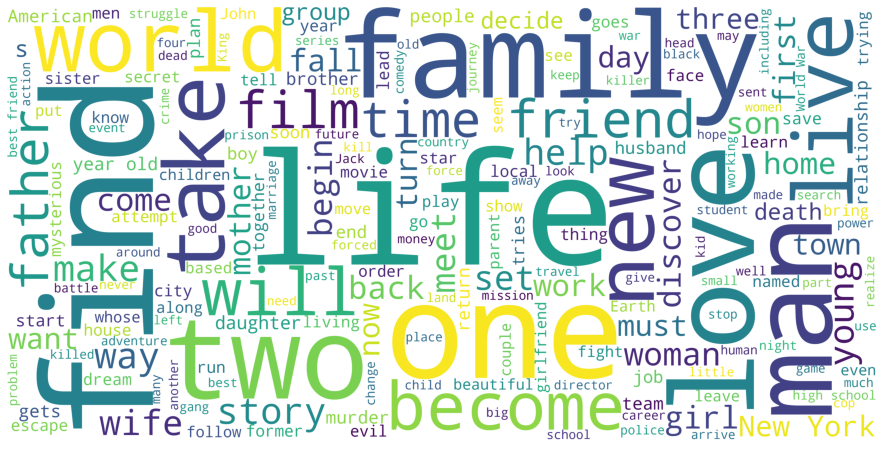

In [42]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

In [43]:
df['production_countries'] = df['production_countries'].fillna('[]').apply(literal_eval)
df['production_countries'] = df['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [44]:
s = df.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [45]:
con_df = df.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,num_movies,country
0,6903,United States of America
1,1214,United Kingdom
2,740,France
3,569,Germany
4,361,Canada
5,307,Japan
6,272,Italy
7,167,Australia
8,125,Spain
9,101,Sweden


In [46]:
con_df = con_df[con_df['country'] != 'United States of America']

In [47]:
data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(0, 255, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

In [48]:
df['production_companies'] = df['production_companies'].fillna('[]').apply(literal_eval)
df['production_companies'] = df['production_companies'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [49]:
s = df.apply(lambda x: pd.Series(x['production_companies']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'companies'

In [50]:
com_df = df.drop('production_companies', axis=1).join(s)

In [51]:
com_sum = pd.DataFrame(com_df.groupby('companies')['revenue'].sum().sort_values(ascending=False))
com_sum.columns = ['Total']
com_mean = pd.DataFrame(com_df.groupby('companies')['revenue'].mean().sort_values(ascending=False))
com_mean.columns = ['Average']
com_count = pd.DataFrame(com_df.groupby('companies')['revenue'].count().sort_values(ascending=False))
com_count.columns = ['Number']

com_pivot = pd.concat((com_sum, com_mean, com_count), axis=1)

In [52]:
com_pivot.sort_values('Total', ascending=False).head(10)

,Total,Average,Number
Warner Bros.,5.801611e+10,1.378055e+08,421
Universal Pictures,4.986653e+10,1.272105e+08,392
Paramount Pictures,4.578096e+10,1.300595e+08,352
Twentieth Century Fox Film Corporation,4.552525e+10,1.507459e+08,302
Walt Disney Pictures,3.427136e+10,2.809128e+08,122
Columbia Pictures,3.008062e+10,1.432411e+08,210
New Line Cinema,2.140666e+10,1.195903e+08,179
Amblin Entertainment,1.694372e+10,2.647456e+08,64
DreamWorks SKG,1.503943e+10,2.118230e+08,71
Dune Entertainment,1.412568e+10,2.394184e+08,59


In [53]:
com_pivot[com_pivot['Number'] >= 15].sort_values('Average', ascending=False).head(10)

,Total,Average,Number
Pixar Animation Studios,1.083836e+10,6.375508e+08,17
Lucasfilm,8.813240e+09,4.896244e+08,18
DreamWorks Animation,1.327218e+10,4.147558e+08,32
Dentsu,6.203128e+09,3.876955e+08,16
Marvel Enterprises,6.537926e+09,3.632181e+08,18
Jerry Bruckheimer Films,8.163247e+09,3.549238e+08,23
Legendary Pictures,1.239028e+10,3.540081e+08,35
Ingenious Film Partners,8.069107e+09,3.362128e+08,24
Di Bonaventura Pictures,5.677091e+09,3.339465e+08,17
1492 Pictures,5.470575e+09,3.217985e+08,17


In [54]:
com_sum.columns

Index(['Total'], dtype='object')

In [55]:
df['original_language'].drop_duplicates().shape[0]

42

In [56]:
lang_df = pd.DataFrame(df['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head(20)

,number,language
en,8018,en
fr,286,fr
ja,206,ja
de,120,de
it,98,it
es,88,es
sv,48,sv
cn,47,cn
zh,39,zh
da,37,da


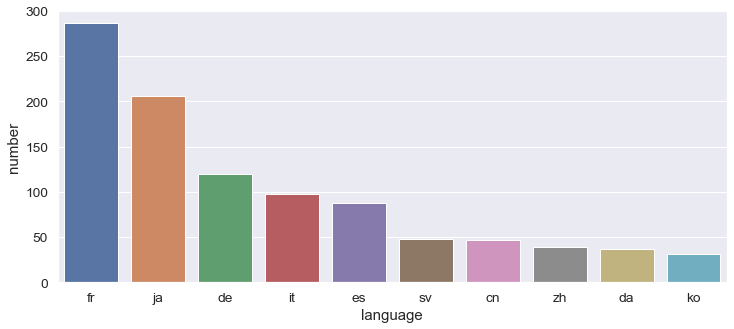

In [57]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11])
plt.show()

In [58]:
popularity_df = df[['title', 'popularity', 'year']].sort_values('popularity', ascending=False)
popularity_df.head(10)

,title,popularity,year
9008,Minions,547.488,2015
8783,Big Hero 6,213.850,2014
8871,Deadpool,187.860,2016
7488,Avatar,185.071,2009
8773,John Wick,183.870,2014
8698,Gone Girl,154.801,2014
8802,The Hunger Games: Mockingjay - Part 1,147.098,2014
8872,Captain America: Civil War,145.882,2016
266,Pulp Fiction,140.950,1994
6981,The Dark Knight,123.167,2008


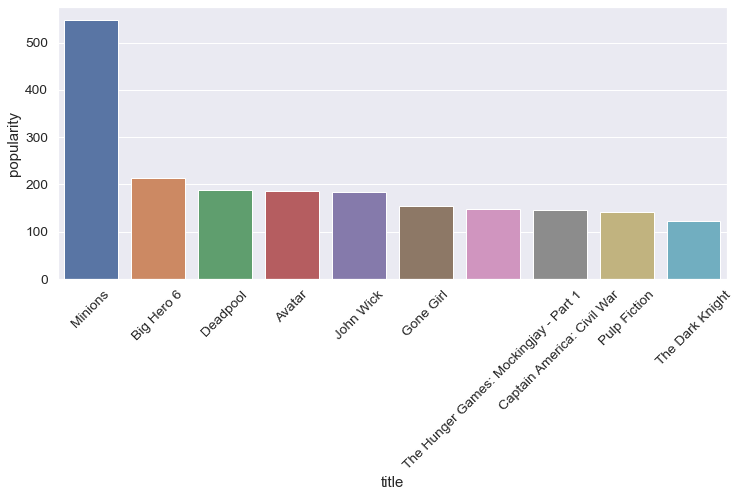

In [59]:
plt.figure(figsize=(12,5))
sns.barplot(x='title', y='popularity', data=popularity_df.iloc[0:10])
plt.xticks(rotation=45)
plt.show()

In [60]:
vote_df = df[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False)
vote_df.head(10)

,title,vote_count,year
7648,Inception,14076.0,2010
6981,The Dark Knight,12270.0,2008
7488,Avatar,12114.0,2009
7969,The Avengers,12001.0,2012
8871,Deadpool,11444.0,2016
8613,Interstellar,11187.0,2014
8310,Django Unchained,10297.0,2012
8712,Guardians of the Galaxy,10014.0,2014
2390,Fight Club,9678.0,1999
8029,The Hunger Games,9634.0,2012


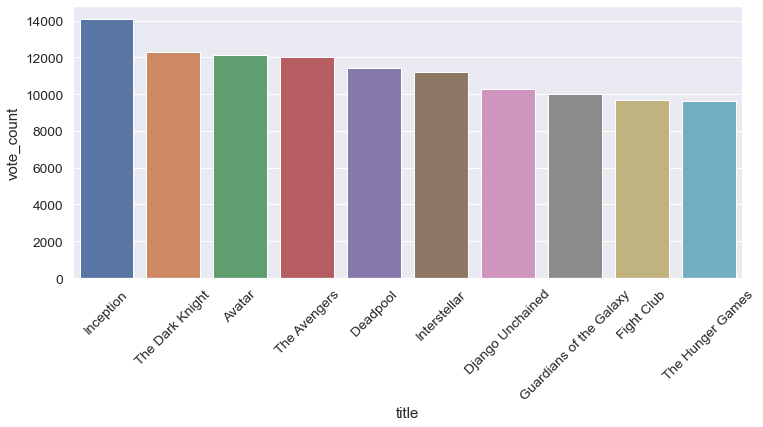

In [61]:
plt.figure(figsize=(12,5))
sns.barplot(x='title', y='vote_count', data=vote_df.iloc[0:10])
plt.xticks(rotation=45)
plt.show()

In [62]:
graph_df = df_metadata[["title","genres","keywords"]]
graph_df.isnull().sum()

title       0
genres      0
keywords    0
dtype: int64

In [63]:
graph_df['soup'] = graph_df['genres'] + graph_df['keywords']

In [64]:
graph_df['soup'].head()

0    Animation,Comedy,Familyjealousy,toy,boy,friend...
1    Adventure,Fantasy,Familyboard game,disappearan...
2    Romance,Comedyfishing,best friend,duringcredit...
3    Comedy,Drama,Romancebased on novel,interracial...
4    Comedybaby,midlife crisis,confidence,aging,dau...
Name: soup, dtype: object

In [65]:
#pip install python-igraph

In [66]:
import igraph as ig
from sklearn.feature_extraction.text import CountVectorizer

In [67]:
graph_size = 20
graph_df = graph_df.sample(n = graph_size)

In [68]:
docs = graph_df['soup']
vec = CountVectorizer()
X = vec.fit_transform(docs)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

    3d  abuse  accusations  accused  action  adult  adventure  \
0    0      0            0        0       0      0          0   
1    0      0            0        0       0      0          0   
2    0      0            0        0       0      0          0   
3    1      0            0        0       1      0          1   
4    0      0            0        0       0      0          0   
5    0      0            0        0       0      0          0   
6    0      0            0        0       0      0          0   
7    0      0            0        0       0      0          0   
8    0      0            0        0       0      1          0   
9    0      0            0        0       0      0          0   
10   0      0            0        0       0      0          0   
11   0      0            0        0       0      0          0   
12   0      0            0        0       0      0          0   
13   0      0            0        0       1      0          1   
14   0      0            

In [69]:
records = df. to_records(index=False)

In [70]:
movie_names = list(graph_df["title"])

In [71]:
#x = records.view(np.int)

In [72]:
x = np.array(records.tolist())

In [73]:
x_t = x.transpose()

In [74]:
x_t.shape

(170, 20)

In [75]:
movieM = np.dot(x,x_t)

In [76]:
movieM

array([[15,  0,  0,  0,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,
         1,  0,  1,  0],
       [ 0,  9,  1,  0,  0,  0,  1,  2,  1,  0,  0,  1,  0,  0,  0,  1,
         0,  0,  0,  1],
       [ 0,  1,  8,  0,  0,  0,  1,  2,  1,  0,  0,  1,  0,  0,  0,  1,
         0,  0,  0,  1],
       [ 0,  0,  0, 10,  0,  0,  0,  1,  0,  0,  0,  0,  0,  2,  0,  0,
         0,  1,  0,  0],
       [ 1,  0,  0,  0,  5,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,
         1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  0,  7,  2,  1,  0,  0,  1,  1,  0,  0,  1,
         0,  0,  0,  1],
       [ 0,  2,  2,  1,  0,  0,  2, 13,  2,  0,  0,  2,  0,  0,  0,  2,
         0,  0,  0,  2],
       [ 0,  1,  1,  0,  0,  0,  1,  2, 14,  0,  0,  1,  0,  2,  0,  1,
         0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0],
       [ 1,  0,  0,  0,  1,  0

In [77]:
weights = []
edges = []
for i in range(graph_size):
    for j in range(graph_size):
        if(i == j):
            continue
        if(movieM[i][j] > 0):
            weights.append(movieM[i][j])
            edges.append((movie_names[i],movie_names[j]))

In [78]:
edges[0]

('Dark Water', 'Interview with the Assassin')

In [79]:
g = ig.Graph(directed=False)
print(g)

IGRAPH U--- 0 0 --


In [80]:
g.add_vertices(movie_names)

In [81]:
g.add_edges(edges)
g.es['weight'] = weights

In [82]:
print(g)

IGRAPH UNW- 20 120 --
+ attr: name (v), weight (e)
+ edges (vertex names):
                      Dark Water -- Interview with the Assassin, Interview
with the Assassin, Wall Street: Money Never Sleeps, Wall Street: Money Never
Sleeps, Le Samouraï, Le Samouraï, State of Siege, State of Siege, Brighton
Beach Memoirs, Brighton Beach Memoirs, Tell No One, Tell No One, Turistas,
Turistas
                        The Jerk -- Nothing but Trouble, Nothing but Trouble,
High Anxiety, High Anxiety, Real Genius, Real Genius, Eight Crazy Nights,
Eight Crazy Nights, The Overnight, The Overnight, Brighton Beach Memoirs,
Brighton Beach Memoirs, Mean Machine, Mean Machine
             Nothing but Trouble -- The Jerk, The Jerk, High Anxiety, High
Anxiety, Real Genius, Real Genius, Eight Crazy Nights, Eight Crazy Nights, The
Overnight, The Overnight, Brighton Beach Memoirs, Brighton Beach Memoirs, Mean
Machine, Mean Machine
Journey 2: The Mysterious Island -- Real Genius, Real Genius, Shaft, Shaft,
John W

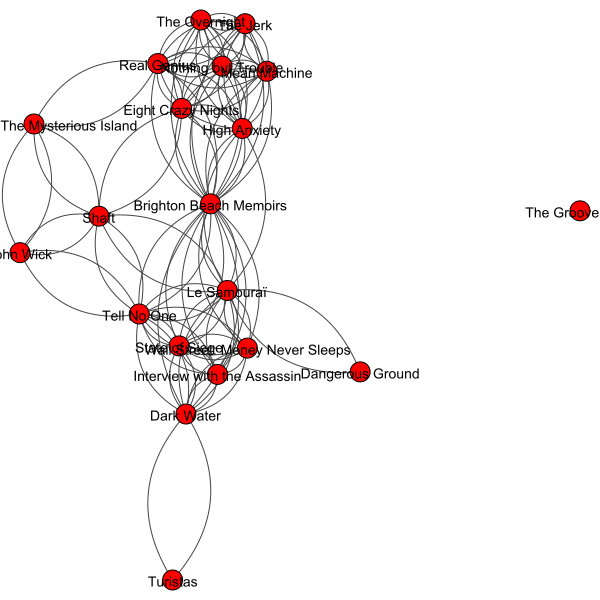

In [83]:
g.vs["label"] = g.vs["name"]
ig.plot(g)

In [84]:
v = g.community_edge_betweenness()

In [85]:
cluster = v.as_clustering()

In [86]:
print(cluster)

Clustering with 20 elements and 5 clusters
[0] Dark Water, The Jerk, Nothing but Trouble, Interview with the Assassin,
    High Anxiety, Real Genius, Eight Crazy Nights, Wall Street: Money Never
    Sleeps, The Overnight, Le Samouraï, State of Siege, Brighton Beach
    Memoirs, Tell No One, Mean Machine
[1] Journey 2: The Mysterious Island, Shaft, John Wick
[2] The Groove Tube
[3] Dangerous Ground
[4] Turistas


In [87]:
pal = ig.drawing.colors.ClusterColoringPalette(len(cluster))

In [88]:
g.vs["color"] = pal.get_many(cluster.membership)

In [89]:
g.vs["label"] = ""

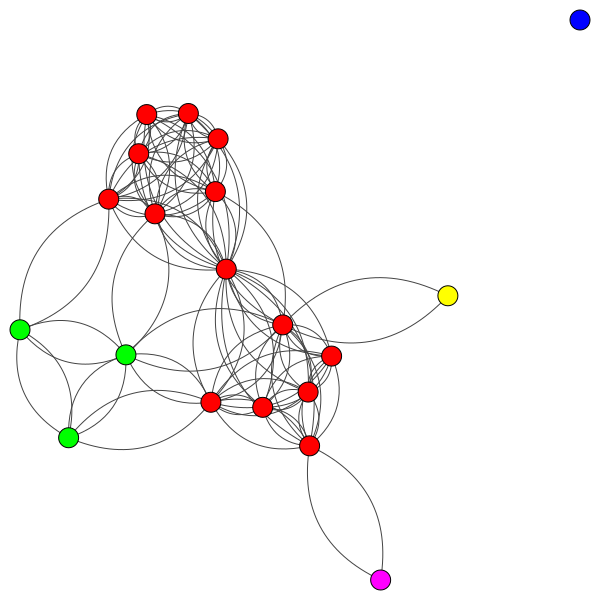

In [90]:
ig.plot(g)

In [91]:
len(cluster)

5

In [92]:
print(v)

Dendrogram, 20 elements, 18 merges

9 0 4 10 12 14 16 1 2 6 7 8 11 15 19 3 13 17 18 5
| | | |  |  |  |  | | | | | |  |  |  | |  |  |  |
| | | |  |  `--'  | | | | | |  `--'  | `--'  |  |
| | | |  |   |    | | | | | |   |    |  |    |  |
| | | |  `---'    | | | | | `---'    |  |    |  |
| | | |    |      | | | | |   |      |  |    |  |
| | | `----'      | | | | `---'      |  |    |  |
| | |   |         | | | |   |        |  |    |  |
| | |   |         | | | `---'        |  |    |  |
| | |   |         | | |   |          |  |    |  |
| | `---'         | | `---'          `--'    |  |
| |   |           | |   |             |      |  |
| |   |           | `---'             |      |  |
| |   |           |   |               |      |  |
| `---'           `---'               |      |  |
|   |               |                 |      |  |
|   `---------------'                 |      |  |
|           |                         |      |  |
|           `-------------------------'      |  |
|             